# Code for geometry files

### Importing the geometry file

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import skimage.morphology as mor
from skimage import measure
import copy



## What I want to do

Import numpy
Import scypy 

Load inn array
Pick ij coordinate at radom (1,1022)
Image coordinate (i,j)
See if the coordinates are the same
If not the same load the coordinates into a text file


# Here we are differentiating between tripple junctions and gbs

In [2]:

img = np.loadtxt('1024x1024_N161_noheader.geom')
up = np.roll(img,1, axis = 0)
down = np.roll(img,-1, axis = 0)
right = np.roll(img,1, axis = 1)
left = np.roll(img,-1, axis = 1)

# Make a 3d array and swap the axes to make it easier to manage
a_3d_array = np.array([img,up,down,right,left]).swapaxes(0,2).swapaxes(0,1)

# Make an empty array of the same size as img
unique_points = np.zeros(np.shape(img))

# Go though the (1024, 1024) part of the array, and find the number of unique numbers across the 5 maps
for yidx, y_vals in enumerate(a_3d_array):
    for xidx, val in enumerate(y_vals):
        if len(np.unique(val)) > 1:
            unique_points[yidx][xidx] = len(np.unique(val))
        if len(np.unique(val)) == 1:
            unique_points[yidx][xidx] = -1
 

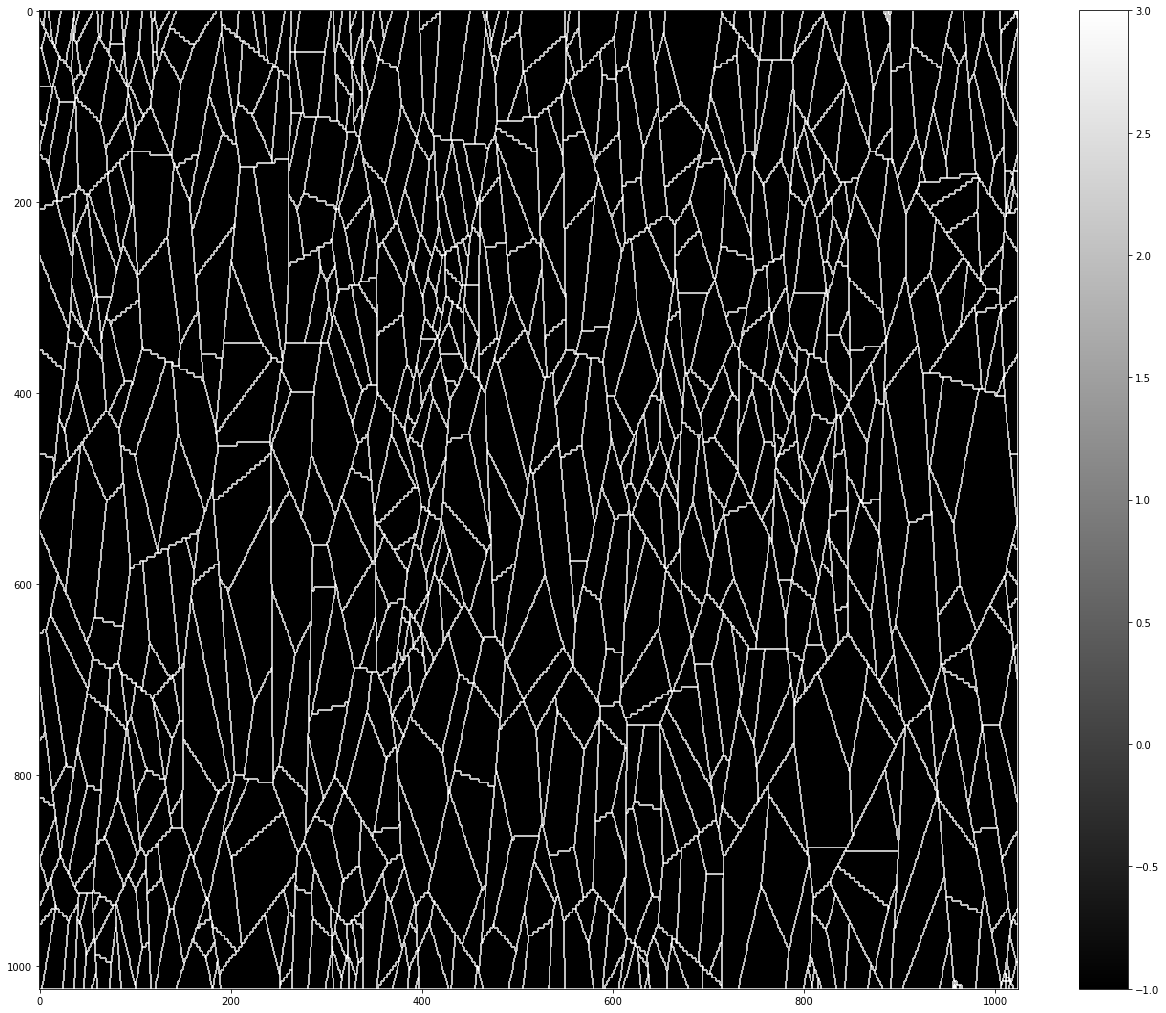

In [3]:
plt.figure(figsize=(22,18))
plt.imshow(img, cmap='viridis')
plt.imshow(unique_points, cmap='gray', vmax=3)

plt.colorbar()

# ORIGINAL MAP IS IN COLOURS
# BOUNDARIES IN BLACK
# TRIPLE POINTS IN WHITE

# Here I am making suub_grains in my microstructure

# Here I want to add the RXA points to the microstrucutre

805.0


/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: This function is deprecated. Please call randint(0, 4604 + 1) instead
/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: This function is deprecated. Please call randint(0, 137879 + 1) instead


933.0


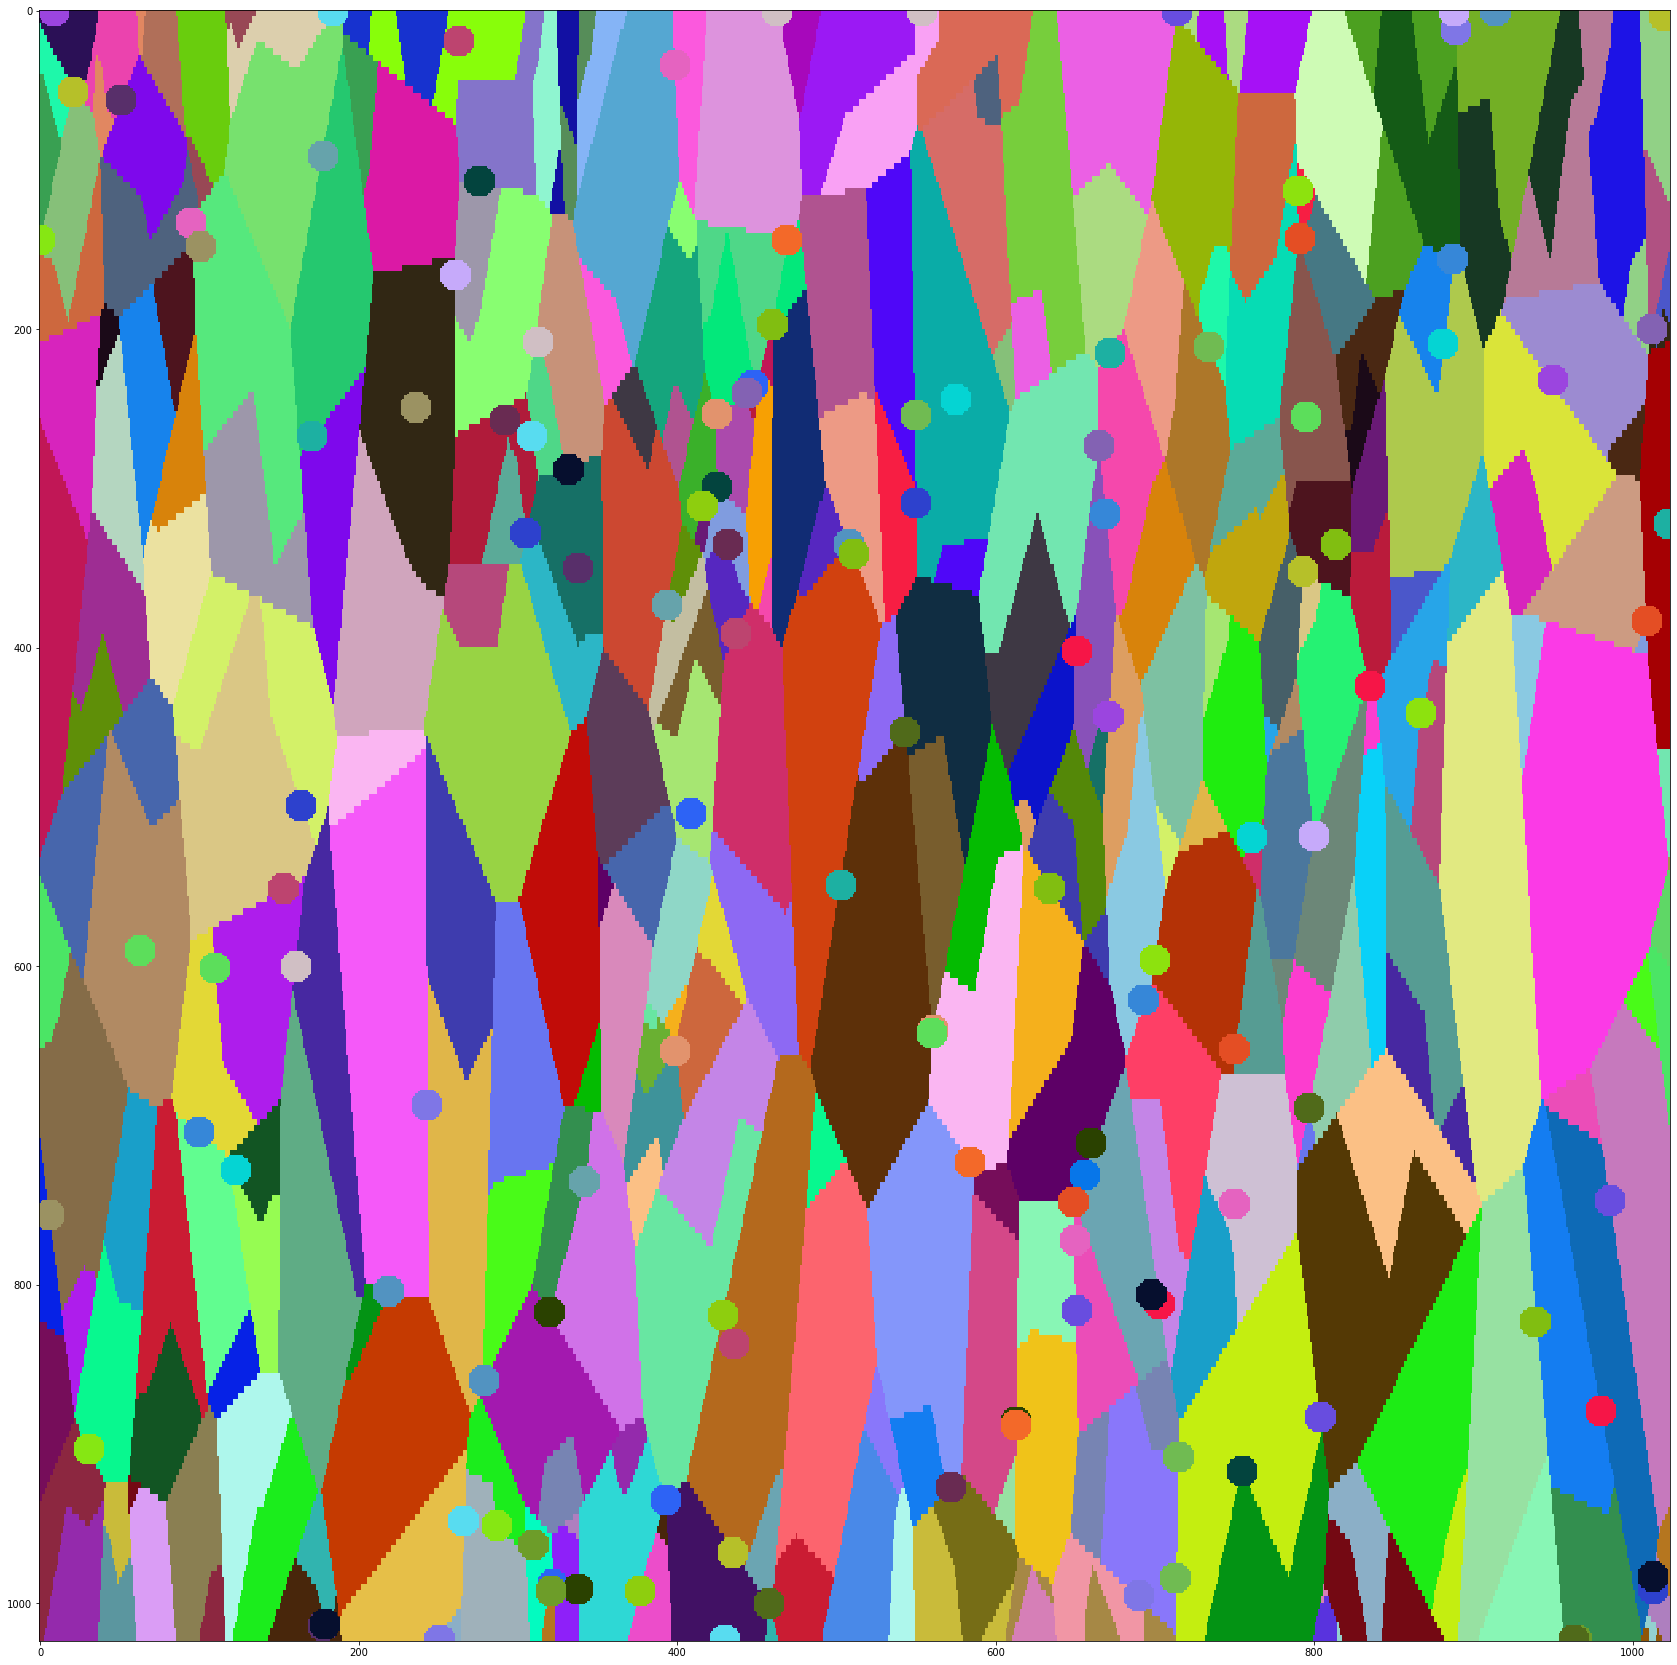

In [5]:

# create a list of all the coordinates of poirnts with values = 3 tripple junctions and another one for grain boundaries

#print(unique_points)
triple_junction = []
for yidx, y_vals in enumerate(unique_points):
    for xidx, val in enumerate(y_vals):
        if val > 2:
            triple_junction.append([xidx, yidx])
            
normal_grain_boundaries = []
for yidx, y_vals in enumerate(unique_points):
    for xidx, val in enumerate(y_vals):
        if val == 2:
            normal_grain_boundaries.append([xidx, yidx])

new_map =img
#print(triple_junction)
#print(len(normal_grain_boundaries))


print(np.amax(new_map))
# now add the points to the microstrucutre
X,Y = np.meshgrid(range(1024),range(1024))
seed_radius = 10
max_phase = np.amax(new_map)
for n in range(85):
    random_point_tj = np.random.random_integers(0,len(triple_junction))
    new_img = \
    np.where((X-triple_junction[random_point_tj][0])*(X-triple_junction[random_point_tj][0]) + \
             (Y-triple_junction[random_point_tj][1])*(Y-triple_junction[random_point_tj][1]) < seed_radius*seed_radius, \
             max_phase+n,new_map)
    new_map = np.copy(new_img)

max_phase = np.amax(new_map)

for n in range(45):
    random_point_gb = np.random.random_integers(0,len(normal_grain_boundaries))
    new_img2 = \
    np.where((X-normal_grain_boundaries[random_point_gb][0])*(X-normal_grain_boundaries[random_point_gb][0]) + \
             (Y-normal_grain_boundaries[random_point_gb][1])*(Y-normal_grain_boundaries[random_point_gb][1]) < seed_radius*seed_radius, \
             max_phase+n,new_map)
    new_map = np.copy(new_img2) 
#np.savetxt('1024x1024_N128_RX.geom',new_img,fmt='%d')


import matplotlib
new_cmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))

plt.figure(figsize=(30, 30))
plt.imshow(new_map, new_cmap)



print(np.amax(new_map))


np.savetxt('1024x1024_N128_RX_sub_grains.geom',new_map,fmt='%d')

            



In [106]:
print(new_map)

[[  0   0   0 ... 156 156 156]
 [  0   0   0 ... 156 156 156]
 [  0   0   0 ... 156 156 156]
 ...
 [744 744 744 ... 838 838 838]
 [744 744 744 ... 838 838 838]
 [744 744 744 ... 839 839 839]]


In [107]:
print(np.amax(new_map))

5276
